In [1]:
import sys
# sys.path.append("C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages")
import os
import numpy as np
import pandas as pd
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
sys.path = ["C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages"] + sys.path

from config import *
from utils.util import *
from model import *
from iterator import DataIterator

Using TensorFlow backend.


In [2]:
hist = pd.read_csv(os.path.join(RESULT_PATH,"checkpoint_hist.csv"))

In [3]:
hist.tail()

,epoch,loss,auc,val_loss,val_auc
28,26,1.481791,0.997007,0.211995,0.947917
29,27,1.447524,0.997415,0.205071,0.942986
30,28,1.419774,0.997973,0.212263,0.951458
31,29,1.396207,0.998300,0.196270,0.952222
32,30,1.373080,0.998483,0.221934,0.940069


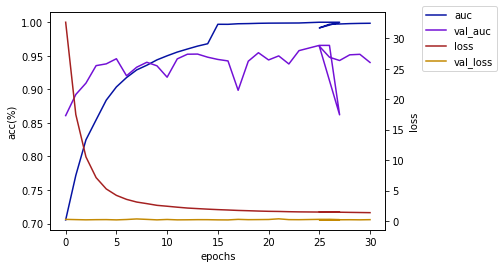

In [4]:
history_graph(hist,metics='auc')

In [5]:
augm = {"gamma":False, "rotate":False, "polar":True, "hiseq":True, "normal":True, "flip":False, "copy":True}
BATCH_SIZE =2 
## load batch generator
# print(f"\ntrain data from : {TRAIN_IMAGE}")
# train_iterator = DataIterator(TRAIN_IMAGE, MASK_LOC, BATCH_SIZE, IMAGE_SHAPE, OPTIC_DISC_SHAPE
#                               , is_train=False, sample=None
#                               , copy = augm['copy'], rotate = augm['rotate'], polar = augm['polar'], hiseq = augm['hiseq']
#                               , gamma = augm['gamma'], flip = augm['flip'], normal = augm['normal'])

print(f"\ntest data from : {TEST_IMAGE}")
test_iterator = DataIterator(TEST_IMAGE, MASK_LOC, BATCH_SIZE, IMAGE_SHAPE, OPTIC_DISC_SHAPE
                             , is_train=False, sample=None
                             , polar= augm['polar'], hiseq = augm['hiseq'], normal = augm['normal'])


test data from : D:\Projects\my_Glaucoma_project_v2\dataset\Glaucoma\Test
 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>____________] 307 Done

KeyboardInterrupt: 

In [ ]:
import json
with open(os.path.join(RESULT_PATH,"model.json"), 'r') as f:
    model_json = json.loads(f.read())

In [ ]:
model = keras.models.model_from_json(model_json)

## Best epoch : checkpoint-024.h5

In [ ]:
model.load_weights(os.path.join(RESULT_PATH,"checkpoint-024.h5"))

In [ ]:
y_pred = model.predict_generator(test_iterator,
                                 steps=None,
                                 max_queue_size=10,
                                 workers=2,
                                 use_multiprocessing=False,
                                 verbose=1
                                 )

In [ ]:
y_true = test_iterator.get_label()

In [ ]:
conf_mat, sensitivity, specificity = confusion_matrix_report(y_true, y_pred)
print(conf_mat)
print(f"sensitivity : {sensitivity}")
print(f"specificity : {specificity}")

In [ ]:
error_df = pd.DataFrame({"Class":y_true.flatten(), "y_pred":y_pred.flatten()})

In [ ]:
visualize_anomaly(error_df,threshold=0.15)